<a href="https://colab.research.google.com/github/tuhanren/Airbnb-Data-Analysis/blob/main/Final_Project_Group15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Objective:

The goal of this project is to help new Airbnb hosts estimate a reasonable nightly **rental price** for their property. Using historical data from Airbnb listings, we will build predictive models that consider factors such as **location(lat and long)**, **availability**, and **house rules?(50k missing)** to forecast the most suitable rental price for new listings.

Dataset: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/dataLinks to an external site.

Data dictionary: https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz


Key Analysis Steps:

1. Data Cleaning: Clean the dataset by handling missing values, fixing inconsistencies, and addressing any outliers.
2. Descriptive Analytics: Explore the overall distribution of rental prices, relationships between location and price, popular room types and other descriptive insights.
3. Diagnostic Analytics: Perform correlation analysis and regression to find which factors (location, room type, availability, etc.) most influence rental prices.
4. Predictive Analytics: Build models that predict rental prices based on property characteristics and availability.

Practical Use Case:
New hosts will be able to input their property’s details, such as location, room type, availability, etc. Our model will then predict a reasonable nightly rental price based on similar listings from the historical data, helping the host price their property competitively.

Feasibility:
This project is feasible using Python libraries like pandas for data handling, scikit-learn and keras for modeling, and matplotlib for visualization. The final result will not only provide price recommendations for new Airbnb hosts but also reveal market trends and insights.

In [1]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.
%cd '/drive/MyDrive/Colab Notebooks/INF1340/group project/'

Mounted at /drive
/drive/MyDrive/Colab Notebooks/INF1340/group project


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Airbnb_Open_Data.csv')
df.sample(5)

<ipython-input-3-3c600b2175be>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
28937,16983241,Outdoor Space 2bed 2bath plus POOL,5823780839,unconfirmed,Yaacov,Manhattan,Upper East Side,40.77710,-73.95020,United States,...,$158,31.0,4.0,4/21/2019,0.29,5.0,33.0,342.0,"Non Smoking, No illicit Drug Usage. Keep loud ...",NaN
115,1064851,2 BR / 2 Bath Duplex Apt with patio! East Village,63842204720,NaN,Olivia,Manhattan,East Village,40.72540,-73.98157,United States,...,$135,2.0,7.0,8/9/2017,0.06,5.0,NaN,417.0,No smoking or drugs anywhere on property; no p...,NaN
23407,13929022,Peaceful Garden Oasis in Heart of Park Slope,57788280523,verified,Maya,Brooklyn,Park Slope,40.66682,-73.97680,United States,...,$32,2.0,80.0,7/6/2019,3.43,1.0,1.0,70.0,PLEASE READ ALL HOUSE RULES TRASH can only go ...,NaN
3282,2813985,Colorful 1 Bedroom APT in the East Village,61052512402,unconfirmed,Monica,Manhattan,East Village,40.73340,-73.98801,United States,...,$54,18.0,34.0,6/1/2018,0.50,5.0,1.0,257.0,NaN,NaN
75922,42933057,Clean bright comfy 1BR east Harlem,5507147654,unconfirmed,John,Manhattan,East Harlem,40.79853,-73.93772,United States,...,$21,29.0,9.0,4/2/2018,0.26,2.0,1.0,35.0,COMMON SENSE ----------------- Common sense ...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

**Conclusion from info():**


1.   Column name format needs to be aligned
2.   Dtype adjustment(float:, int:, date:, category: )
3.   Null values





In [5]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


**Conclusion from describe():**


1.   `minium nights` and `availability 365` contains negative numbers, need to be handled.



In [6]:
df.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


**Conclusion from isnull():** <br/>
**Columns to drop:(待讨论)**

1.   High missing rate (`license`, `house_rules`, `reviews per month`, `last review`)
2.   No need for analysis (`NAME`, `host id`, `host name`, `host_identity_verified`, `country`, `country code`, `calculated host listings count` )

**Rows to drop:(待讨论)**
1.   `lat` and `long`: 8 rows.
2.   `neighbourhood group`: 29 rows.
3.   `neighbourhood`: 16 rows.
4.   `construction year`: 214 rows.

**Null values need to be handled(numerical):**

1.   `price`: 247 rows, fill with mean.
2.   `service fee`:273 rows, fill with 0.0.
3.   `minimum nights`: 409 rows, fill with 0.
4.   `number of reviews`: 183 rows, fill with 0.
5.   `review rate number`: 326 rows, fill with 0.
6.   `availability 365`: 448 rows, fill with 0.

**Null values need to be handled(categrical):**
1.   `host identity verified`: 289 rows, fill with 'unconfirmed'.
2.   `cancellation policy`: 76 rows, fill with 'unknown'.
3.   `instant bookable`: 105 rows, fill with 'unknown'.


In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df.shape

(102599, 26)

3. **Data Cleaning**: Load and inspect the dataset, ensuring you understand its structure and data
types.

*   Identify and handle missing data (remove, impute, or flag missing values).
*   Detect and handle outliers, if needed.
*   Resolve data inconsistencies (e.g., fix typos or standardize units).
*   Transform and normalize variables if necessary.

In [9]:
df_cleaned = df.copy()
df_cleaned.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Rename all columns, align format


In [10]:
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace('_', ' ')
df_cleaned.columns # check

Index(['id', 'name', 'host id', 'host identity verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant bookable', 'cancellation policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house rules', 'license'],
      dtype='object')

Convert price to numeric type and fill missing values

In [11]:
df_cleaned['price'] = df_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)
# df_cleaned['price'].isnull().sum() # 247
# group the data then calculate the mean for each group, align group means with the original data, fillna
df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned.groupby(['neighbourhood', 'room type'])['price'].transform('mean'))
# for the row 517, it remains empty since both 'neighbourhood', 'room type' is null, so fill with the overall 'mean'
df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned['price'].mean())
df_cleaned['price'].isnull().sum() # check

0

Convert 'service fee' column to numeric type by removing any dollar signs or commas, then fill missing values


In [12]:
df_cleaned['service fee'] = df_cleaned['service fee'].replace('[\$,]', '', regex=True).astype(float)
# fill missing values in 'service fee' column with 0.0
df_cleaned['service fee'] = df_cleaned['service fee'].fillna(0.0)
# verify if there are any remaining null values
df_cleaned['service fee'].isnull().sum()

0

For the columns bleow, fillna with 0 and ensure the type of int


In [13]:
int_columns = ['minimum nights', 'number of reviews',
               'review rate number', 'availability 365']
df_cleaned[int_columns] = df_cleaned[int_columns].fillna(0).astype(int)
df_cleaned[int_columns].isnull().sum() # check

,0
minimum nights,0
number of reviews,0
review rate number,0
availability 365,0


Filling missing values with 'unknown' or 'unconfirmed' for some non-numerical columns


In [14]:
df_cleaned['host identity verified'] = df_cleaned['host identity verified'].fillna('unconfirmed')
df_cleaned['cancellation policy'] = df_cleaned['cancellation policy'].fillna('unknown')
df_cleaned['instant bookable'] = df_cleaned['instant bookable'].fillna('unknown')

df_cleaned[['host identity verified', 'cancellation policy', 'instant bookable']].isnull().sum() # check

,0
host identity verified,0
cancellation policy,0
instant bookable,0


Drop the rows that with null values for columns `lat`, `long`, `neighbourhood group`, and `neighbourhood`


In [15]:
df_cleaned = df_cleaned.dropna(subset=['lat', 'long', 'neighbourhood group', 'neighbourhood', 'construction year'])
df_cleaned[['lat', 'long', 'neighbourhood group', 'neighbourhood', 'construction year']].isnull().sum() # check

,0
lat,0
long,0
neighbourhood group,0
neighbourhood,0
construction year,0


Handle the `minimum nights` and `availability 365` negative values.

In [16]:
# minium nighs
df_cleaned[df_cleaned['minimum nights'] < 0]

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house rules,license
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,231.0,-10,213,6/24/2019,2.00,5,2.0,19,There is no smoking on the property. No outsid...,NaN
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,NaN,...,15.0,-5,104,6/21/2019,1.04,5,1.0,31,We are a second-floor apartment so please do n...,NaN
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,156.0,-1,82,5/19/2019,0.94,2,2.0,131,"no inside smoking, quiet(ish) after 11, help y...",NaN
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,175.0,-10,68,6/10/2019,0.69,5,1.0,13,NaN,NaN
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,184.0,-12,203,7/6/2019,2.14,5,3.0,77,NaN,NaN
478,1265335,Charming upper west side apartment,89878315253,unconfirmed,Alen,Manhattan,Upper West Side,40.77886,-73.98042,United States,...,82.0,-2,129,6/7/2019,1.33,2,1.0,381,Please remember that this is a residential bui...,NaN
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,verified,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,United States,...,83.0,-3,42,5/18/2019,0.44,5,1.0,292,BUILDING IS RESIDENTIAL. DOCTORS AND NURSES WH...,NaN
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,...,240.0,-1223,0,NaN,NaN,2,4.0,341,Smoking is strictly prohibited. Your pets are ...,NaN
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,...,142.0,-365,13,7/7/2019,5.91,4,4.0,0,Please pick up/drop packet with front desk con...,NaN
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,...,17.0,-200,3,4/23/2019,1.06,2,1.0,157,No smoking or pets allowed and we request that...,NaN


In [17]:
# availability 365
df_cleaned[df_cleaned['availability 365'] < 0]

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house rules,license
139,1078106,FLAT MACDONOUGH,12359551036,unconfirmed,Frederick,Brooklyn,Bedford-Stuyvesant,40.68296,-73.93662,United States,...,119.0,0,227,6/23/2019,2.09,5,2.0,-10,NaN,NaN
142,1079763,"Sun-drenched, artsy modernist 1 BDRM duplex",83716006050,unconfirmed,Kellan,Brooklyn,Williamsburg,40.71561,-73.94835,United States,...,132.0,0,10,NaN,0.10,5,1.0,-2,Quiet after 11pm. Other guests sleeping.,NaN
170,1095227,New York room with a view,95792367490,unconfirmed,Dexter,Staten Island,St. George,40.64524,-74.08088,United States,...,203.0,131,166,6/13/2019,1.66,4,1.0,-1,Please tell me about who you will be traveling...,NaN
236,1131679,NaN,74291995690,unconfirmed,Cameron,Manhattan,East Harlem,40.79163,-73.94573,United States,...,210.0,28,183,9/29/2018,1.83,2,2.0,-6,- We have school age children and request that...,NaN
251,1139963,B NYC Staten Alternative...,13992927619,unconfirmed,Fowler,Staten Island,Tompkinsville,40.63627,-74.08543,United States,...,157.0,2,147,NaN,NaN,0,6.0,-1,"Rules are detailed in the House Manual, which ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86735,48905077,Comfortable 2 BR in East Village/Cooper Square,66319244844,unconfirmed,Cooper,Manhattan,East Village,40.72627,-73.99145,United States,...,67.0,3,27,4/23/2019,0.76,5,1.0,-4,No Smoking in the Apartment. Pretty laid back...,NaN
86764,48921093,"Beautiful hip location, with a light of sunshine.",11182626298,verified,Noemi,Queens,Ridgewood,40.70971,-73.89741,United States,...,121.0,28,1,9/15/2018,0.10,4,1.0,-2,NaN,NaN
86790,48935453,Beautiful Quiet Bedroom near City College,59344299465,unconfirmed,Erika,Manhattan,Harlem,40.81863,-73.95295,United States,...,190.0,2,0,NaN,NaN,4,3.0,-7,Please be respectful of other guests. Keep th...,NaN
86853,48970248,West Chelsea 1 bedroom 2 bathroom outdoor space.,34380933090,unconfirmed,Alison,Manhattan,Chelsea,40.74584,-74.00279,United States,...,130.0,14,0,NaN,NaN,5,1.0,-7,- $20 per extra person. Maximum 2 person for a...,NaN


**For `minium nights` and `availability 365`:**


*   `minium nights`: This column contains unrealistic high values such as 1223 and 200, which indicates potential data quality issues. Using abs() is not appropriate in this context, as it could mask underlying problems. There are only 13 rows with negative values, so it is recommended to drop these rows for data accuracy.
*   `availability 365`: This column has 431 rows with negative values. According to the column's data dictionary, a negative value implies that there will be no availability within the next 365 days. Therefore, it is recommended to change all negative values to 0 to reflect this condition properly.



In [18]:
# Handle the `minimum nights` and `availability 365` columns
df_cleaned = df_cleaned[df_cleaned['minimum nights'] >= 0].copy()  # Explicitly create a copy
df_cleaned.loc[:, 'availability 365'] = df_cleaned['availability 365'].apply(lambda x: 0 if x < 0 else x)
print(df_cleaned['minimum nights'].describe()) # check
print(df_cleaned['availability 365'].describe()) # check
# df.info() # check

count    102325.000000
mean          8.121143
std          30.228830
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64
count    102325.000000
mean        140.511801
std         135.433568
min           0.000000
25%           2.000000
50%          95.000000
75%         268.000000
max        3677.000000
Name: availability 365, dtype: float64


Drop columns with high missing rates and unneeded, will not use for analysis



In [19]:
columns_to_drop = ['house rules', 'license', 'name', 'host id', 'country',
                   'country code', 'host name', 'calculated host listings count',
                   'last review', 'reviews per month']
df_cleaned = df_cleaned.drop(columns_to_drop, axis=1)
df_cleaned.columns # check

Index(['id', 'host identity verified', 'neighbourhood group', 'neighbourhood',
       'lat', 'long', 'instant bookable', 'cancellation policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number', 'availability 365'],
      dtype='object')

Drop duplicated records since the dataset is rental listings (541 duplicated rows)


In [20]:
# df_cleaned[df_cleaned.duplicated()]
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum() # check
# df_cleaned.info() # check

0

Convert relevant columns to category type


In [21]:
categorical_columns = ['host identity verified', 'neighbourhood group', 'neighbourhood',
                       'instant bookable', 'cancellation policy', 'room type']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')
df_cleaned[categorical_columns].info() # check

<class 'pandas.core.frame.DataFrame'>
Index: 101784 entries, 0 to 102057
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   host identity verified  101784 non-null  category
 1   neighbourhood group     101784 non-null  category
 2   neighbourhood           101784 non-null  category
 3   instant bookable        101784 non-null  category
 4   cancellation policy     101784 non-null  category
 5   room type               101784 non-null  category
dtypes: category(6)
memory usage: 1.5 MB


Convert relevant columns to int type

In [23]:
int_columns = ['construction year']
df_cleaned[int_columns] = df_cleaned[int_columns].astype(int)
df_cleaned[int_columns].info() # check

<class 'pandas.core.frame.DataFrame'>
Index: 101784 entries, 0 to 102057
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   construction year  101784 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [24]:
df_cleaned.info() # check for all Dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 101784 entries, 0 to 102057
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      101784 non-null  int64   
 1   host identity verified  101784 non-null  category
 2   neighbourhood group     101784 non-null  category
 3   neighbourhood           101784 non-null  category
 4   lat                     101784 non-null  float64 
 5   long                    101784 non-null  float64 
 6   instant bookable        101784 non-null  category
 7   cancellation policy     101784 non-null  category
 8   room type               101784 non-null  category
 9   construction year       101784 non-null  int64   
 10  price                   101784 non-null  float64 
 11  service fee             101784 non-null  float64 
 12  minimum nights          101784 non-null  int64   
 13  number of reviews       101784 non-null  int64   
 14  review ra

**Dealing with inconsitant data**:<br/>


*   `neighbourhood group`: Case differences like 'manhatan' and 'Manhattan'.
*   `availability 365`: By defination it is the availability of the listing x days in the future as determined by the calendar. So it should not be over 365.



In [25]:
# Find inconsistant values in `neighbourhood group` column
df_cleaned['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43450
Brooklyn,41516
Queens,13178
Bronx,2690
Staten Island,948
brookln,1
manhatan,1


In [41]:
# Handle the inconsistant values and style in the column
df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].replace({'manhatan': 'Manhattan'}).str.title().astype('category')
# df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].astype('category')
df_cleaned['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43451
Brooklyn,41516
Queens,13178
Bronx,2690
Staten Island,948
Brookln,1


In [42]:
# Find inconsistant values in `neighbourhood` column
# df_cleaned['neighbourhood'].unique()
# df_cleaned['neighbourhood'].value_counts()
unique_neighbourhoods = df_cleaned['neighbourhood'].value_counts()
unique_neighbourhoods = unique_neighbourhoods.sort_index()
print(unique_neighbourhoods.to_string())

neighbourhood
Allerton                        95
Arden Heights                    9
Arrochar                        51
Arverne                        219
Astoria                       1864
Bath Beach                      47
Battery Park City              117
Bay Ridge                      301
Bay Terrace                      8
Bay Terrace, Staten Island       4
Baychester                      27
Bayside                        122
Bayswater                       40
Bedford-Stuyvesant            7877
Belle Harbor                    30
Bellerose                       26
Belmont                         45
Bensonhurst                    156
Bergen Beach                    30
Boerum Hill                    356
Borough Park                   267
Breezy Point                     9
Briarwood                      121
Brighton Beach                 167
Bronxdale                       46
Brooklyn Heights               306
Brownsville                    152
Bull's Head                     12
Bushwi

In [28]:
df_cleaned['construction year'].value_counts()

,count
construction year,
2014,5215
2008,5190
2006,5190
2019,5170
2009,5137
2020,5133
2010,5127
2022,5107
2003,5098


In [38]:
# `availability 365` should not have value over 365
df_cleaned['availability 365'] = df_cleaned['availability 365'].apply(lambda x: min(x, 365))
df_cleaned['availability 365'].max()

365

**Dealing with outliers**:<br/>


*   `minimum nights`: By defination it is the minimum number of night stay for the listing (calendar rules may be different). For airbnb kind short-term rental, this value should far less than 365, or the maximum value should be 365.

In [39]:
# `minimum nights	` should not have value over 365
df_cleaned['minimum nights'] = df_cleaned['minimum nights'].apply(lambda x: min(x, 365))
df_cleaned['minimum nights'].max()

365

In [43]:
# df_cleaned.to_csv('cleaned_data.csv', index=False)
df_cleaned.describe()

,id,lat,long,construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365
count,1.017840e+05,101784.000000,101784.000000,101784.000000,101784.000000,101784.000000,101784.000000,101784.000000,101784.000000,101784.000000
mean,2.923477e+07,40.728095,-73.949638,2012.487817,625.379197,124.716419,7.934538,27.377387,3.269276,139.565610
std,1.624283e+07,0.055860,0.049526,5.765646,331.281565,66.547602,18.243274,49.406487,1.295444,133.473246
min,1.001254e+06,40.499790,-74.249840,2003.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.516438e+07,40.688730,-73.982580,2007.000000,341.000000,67.000000,1.000000,1.000000,2.000000,2.000000
50%,2.924182e+07,40.722295,-73.954430,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000,95.000000
75%,4.329937e+07,40.762760,-73.932340,2017.000000,912.000000,182.000000,5.000000,30.000000,4.000000,268.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,1200.000000,240.000000,365.000000,1024.000000,5.000000,365.000000


In [44]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101784 entries, 0 to 102057
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      101784 non-null  int64   
 1   host identity verified  101784 non-null  category
 2   neighbourhood group     101784 non-null  category
 3   neighbourhood           101784 non-null  category
 4   lat                     101784 non-null  float64 
 5   long                    101784 non-null  float64 
 6   instant bookable        101784 non-null  category
 7   cancellation policy     101784 non-null  category
 8   room type               101784 non-null  category
 9   construction year       101784 non-null  int64   
 10  price                   101784 non-null  float64 
 11  service fee             101784 non-null  float64 
 12  minimum nights          101784 non-null  int64   
 13  number of reviews       101784 non-null  int64   
 14  review ra

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'construction year'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'service fee'}>],
       [<Axes: title={'center': 'minimum nights'}>,
        <Axes: title={'center': 'number of reviews'}>,
        <Axes: title={'center': 'review rate number'}>],
       [<Axes: title={'center': 'availability 365'}>, <Axes: >, <Axes: >]],
      dtype=object)

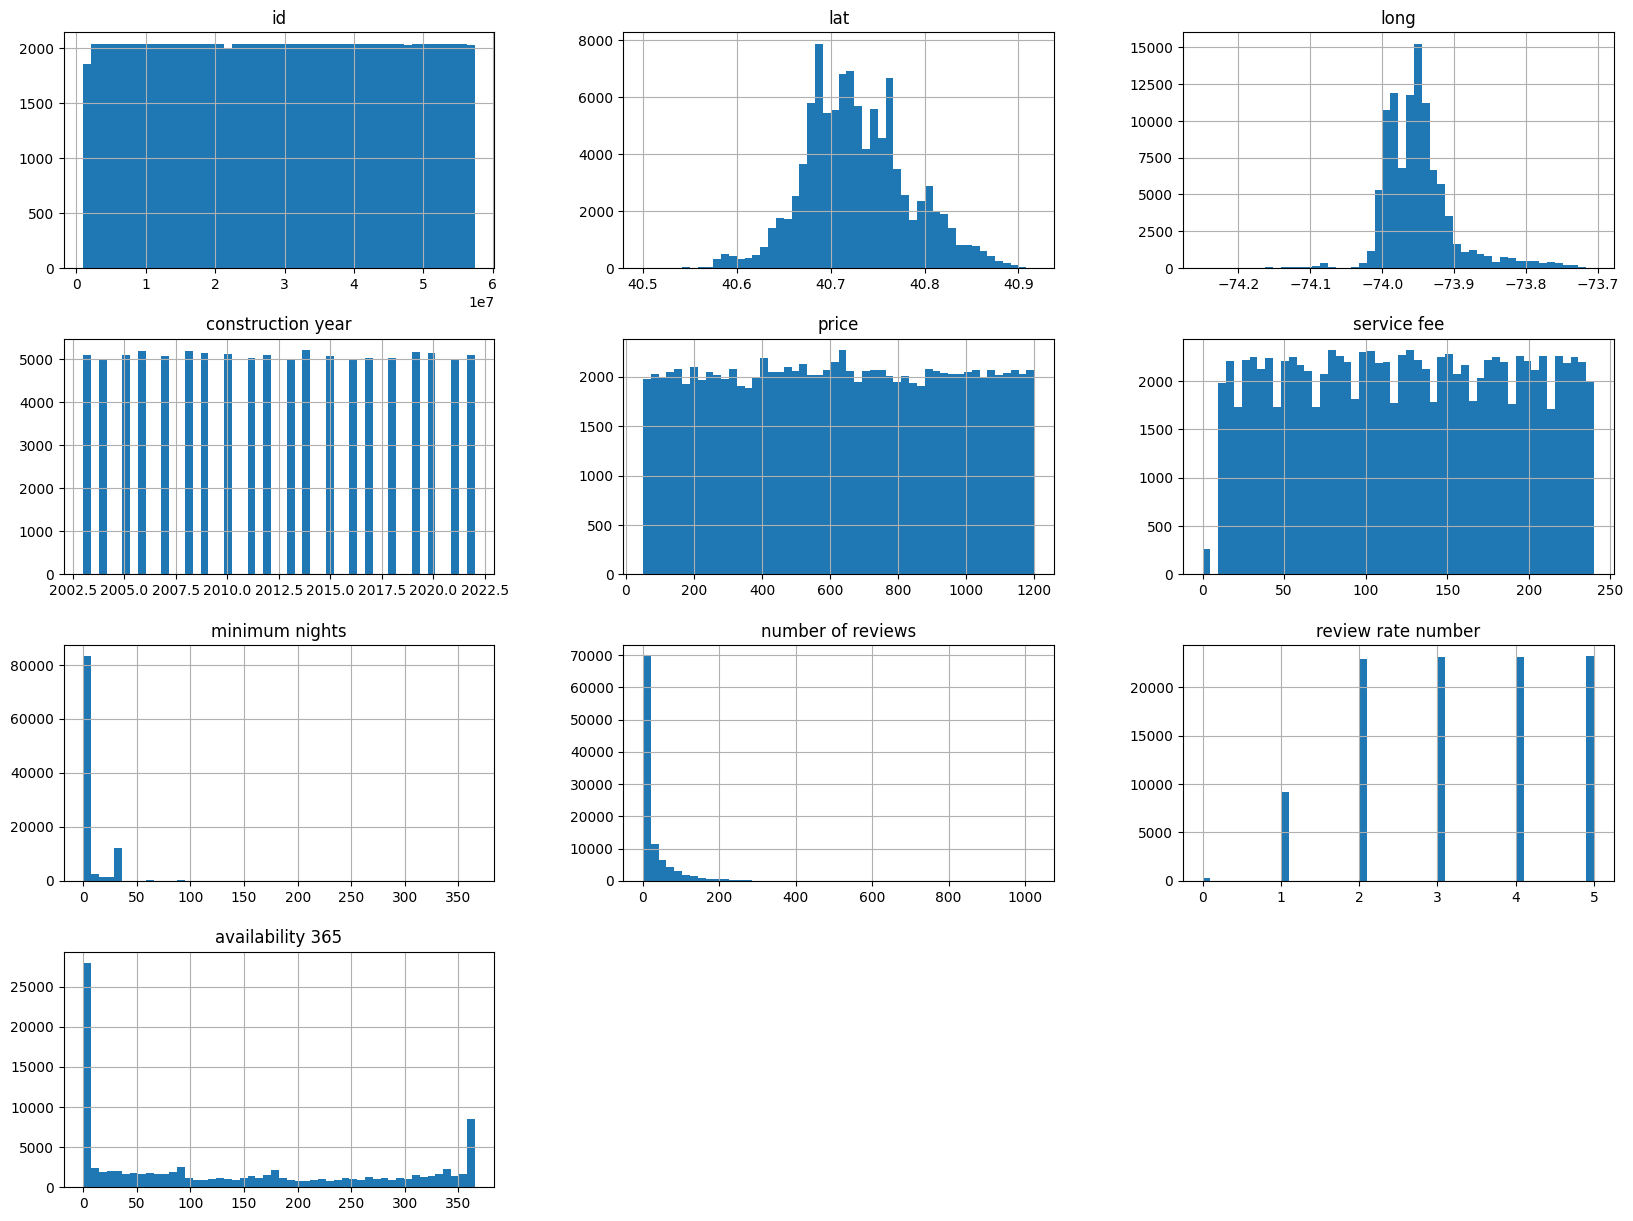

In [55]:
# 请给我画图展示出每一列的值分布情况
df_cleaned.hist(bins=50, figsize=(20,15))


<Axes: xlabel='price', ylabel='minimum nights'>

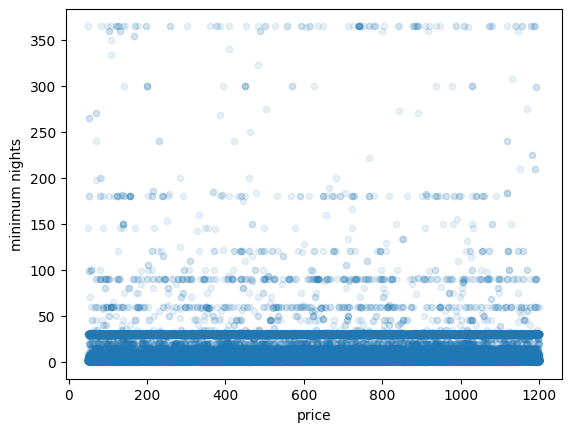

In [57]:
# scatter plot
import matplotlib.pyplot as plt
df_cleaned.plot(kind='scatter', x='price', y='minimum nights', alpha=0.1)

,0
id,"Axes(0.125,0.747241;0.352273x0.132759)"
lat,"Axes(0.547727,0.747241;0.352273x0.132759)"
long,"Axes(0.125,0.587931;0.352273x0.132759)"
construction year,"Axes(0.547727,0.587931;0.352273x0.132759)"
price,"Axes(0.125,0.428621;0.352273x0.132759)"
service fee,"Axes(0.547727,0.428621;0.352273x0.132759)"
minimum nights,"Axes(0.125,0.26931;0.352273x0.132759)"
number of reviews,"Axes(0.547727,0.26931;0.352273x0.132759)"
review rate number,"Axes(0.125,0.11;0.352273x0.132759)"
availability 365,"Axes(0.547727,0.11;0.352273x0.132759)"


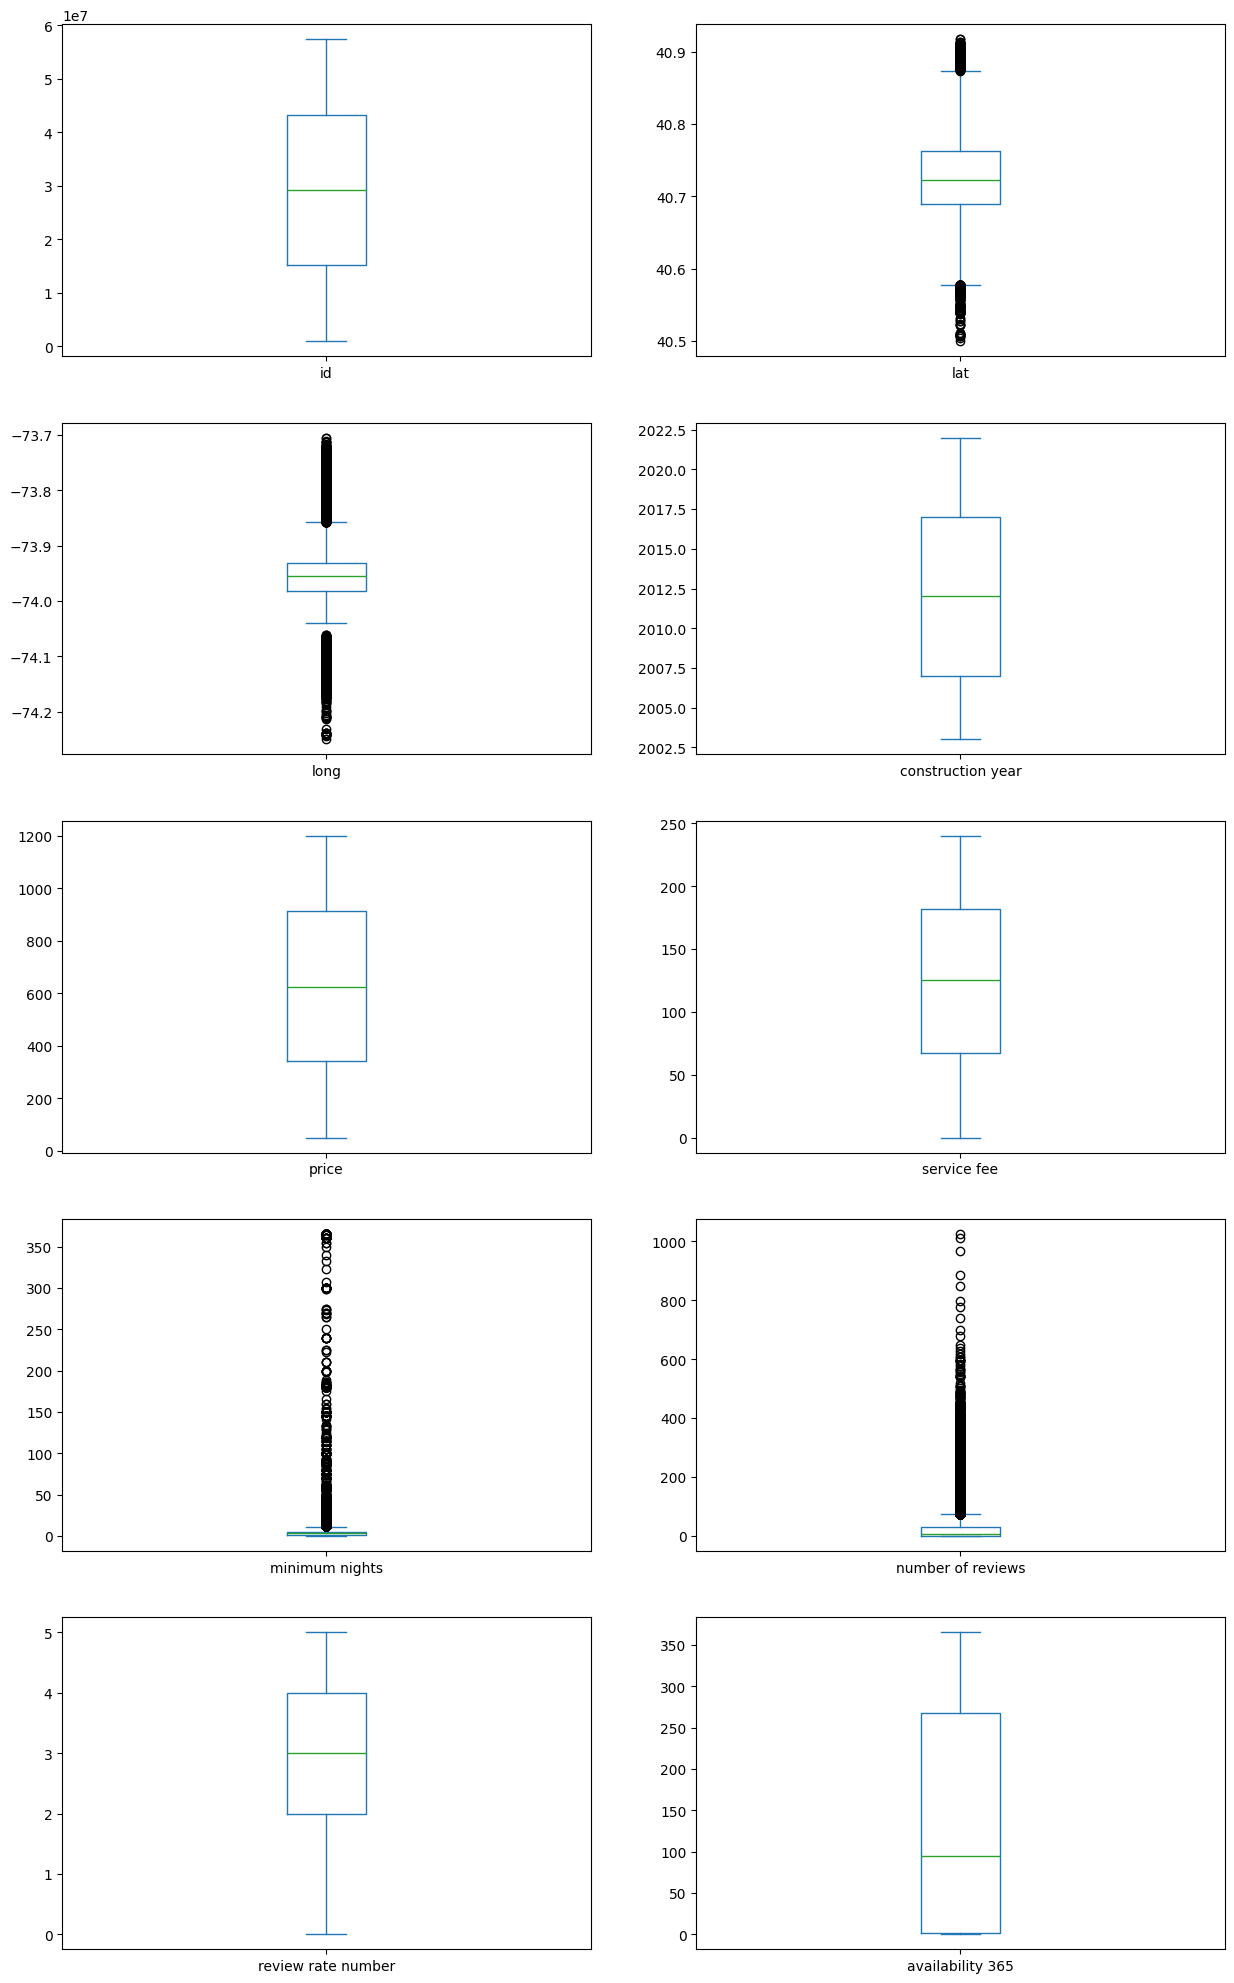

In [59]:
# box plot
# box plot
# The layout needs to be adjusted to accommodate all numerical columns
# Calculate the number of numerical columns for layout
num_cols = len(df_cleaned.select_dtypes(include=['number']).columns)

# Adjust layout to accommodate all columns. For example:
import math
ncols = 2 # Number of columns you want
nrows = math.ceil(num_cols / ncols) # Calculate rows needed

df_cleaned.plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(15, 5*nrows))

**Transform and normalize variables if necessary:**<br/>


1.   `host identity verified`,  `neighbourhood group`, `neighbourhood`, `instant bookable`, `cancellation policy`, `room type`, are category types, they needs to be converted to numerical form to be used in machine learning models.






In [48]:
# Find out each categorical columns' unique value count
categorical_columns = ['host identity verified', 'neighbourhood group', 'neighbourhood', 'instant bookable', 'cancellation policy', 'room type']
for col in categorical_columns:
    print(f"{col}: {df_cleaned[col].nunique()}")

host identity verified: 2
neighbourhood group: 6
neighbourhood: 224
instant bookable: 3
cancellation policy: 4
room type: 4


In [51]:
!pip install category_encoders
from category_encoders import TargetEncoder
df_transformed = df_cleaned.copy()

In [54]:
# Use Target Encoding for columns that contains less unique values
target_encode_cols = ['host identity verified', 'instant bookable', 'cancellation policy', 'room type']
target_encoder = TargetEncoder(cols=target_encode_cols, smoothing=0.3)
df_transformed[target_encode_cols] = target_encoder.fit_transform(df_transformed[target_encode_cols], df_transformed['price'])
df_transformed.head()

,id,host identity verified,neighbourhood group,neighbourhood,lat,long,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365
0,1001254,626.854967,Brooklyn,Kensington,40.64749,-73.97237,625.218834,624.596828,624.995264,2020,966.0,193.0,10,9,4,286
1,1002102,623.892949,Manhattan,Midtown,40.75362,-73.98377,625.218834,625.234818,625.246526,2007,142.0,28.0,30,45,4,228
2,1002403,626.854967,Manhattan,Harlem,40.80902,-73.94190,625.508647,626.243969,624.995264,2005,620.0,124.0,3,0,5,352
3,1002755,626.854967,Brooklyn,Clinton Hill,40.68514,-73.95976,625.508647,625.234818,625.246526,2005,368.0,74.0,30,270,4,322
4,1003689,623.892949,Manhattan,East Harlem,40.79851,-73.94399,625.218834,625.234818,625.246526,2009,204.0,41.0,10,9,3,289


In [53]:
# # Use Hash Encoding for columns that contains large unique values
# import category_encoders as ce
# hash_enc_neigh_group = ce.HashingEncoder(cols=['neighbourhood group'], n_components=4)
# hash_enc_neigh = ce.HashingEncoder(cols=['neighbourhood'], n_components=32)
# df_hashed = hash_enc_neigh_group.fit_transform(df_transformed)
# df_hashed = hash_enc_neigh.fit_transform(df_hashed)
# df_hashed.head()


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365
0,0,0,0,0,0,0,0,0,0,0,...,625.218834,624.596828,624.995264,2020,966.0,193.0,10,9,4,286
1,0,0,0,0,0,0,0,0,0,0,...,625.218834,625.234818,625.246526,2007,142.0,28.0,30,45,4,228
2,0,0,0,0,0,0,0,0,0,0,...,625.508647,626.243969,624.995264,2005,620.0,124.0,3,0,5,352
3,0,0,0,0,0,0,0,0,0,0,...,625.508647,625.234818,625.246526,2005,368.0,74.0,30,270,4,322
4,0,0,0,0,0,0,0,0,0,0,...,625.218834,625.234818,625.246526,2009,204.0,41.0,10,9,3,289
